# Coastal change in African countries

* **Products used:** [DE Africa Coastlines]()



## Description

The rate of change points augmented with country (level 0) and province (level 1) labels will be used to generate continental scale statistics.

In [1]:
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import numpy as np
from shapely.ops import nearest_points

from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.coastal import get_coastlines
#from deafrica_tools.plotting import display_map
from datacube.utils.geometry import Geometry

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Load augmented rate of change

Only `good` rate of change measurements have been kept.
Admin boundary labels have been matched with the following code.

```
gadm_africa  = gpd.read_file("~/dev/data/gadm_africa.gpkg")
gadm_level1 = gadm_africa.dissolve(by=f"GID_1")
gadm_level1 = gadm_level1.to_crs(coastlines.crs)
gadm_level1.reset_index(inplace=True)

# match coastlines to admin region geometries
coastlines = coastlines.sjoin_nearest(gadm_level1[["GID_0", "NAME_0", "GID_1", "NAME_1","geometry"]], how="left", max_distance=1000, distance_col="GID_1_dist")
coastlines = coastlines.drop(columns=["index_right"])

```

In [2]:
%%time
coastlines = gpd.read_file("~/dev/data/deafricacoastlines_v0.4.0_nearest_gadm_level1.gpkg")

CPU times: user 2min 40s, sys: 8.21 s, total: 2min 48s
Wall time: 3min 36s


In [3]:
coastlines.head()

,index,uid,rate_time,sig_time,se_time,outl_time,dist_2000,dist_2001,dist_2002,dist_2003,...,nsm,max_year,min_year,country,certainty,GID_0,NAME_0,GID_1,NAME_1,geometry
0,0,sv0e5jprxn,-0.19,0.004,0.06,2016 2018 2019,3.11,1.34,1.79,1.55,...,-3.11,2000,2010,Egypt,good,EGY,Egypt,EGY.22_1,Janub Sina',POINT (3337964.536 3511650.480)
1,1,sv0e5jr8u3,-0.33,0.013,0.12,2019,3.08,0.94,1.69,0.74,...,-3.08,2000,2018,Egypt,good,EGY,Egypt,EGY.22_1,Janub Sina',POINT (3337985.922 3511671.507)
2,2,sv0e5jrcce,-0.30,0.105,0.17,None,2.46,-0.39,0.97,-0.46,...,-2.46,2000,2019,Egypt,good,EGY,Egypt,EGY.22_1,Janub Sina',POINT (3338007.608 3511692.203)
3,3,sv0e5jrfyy,-0.04,0.444,0.05,None,2.33,0.27,0.25,-0.92,...,-2.33,2000,2010,Egypt,good,EGY,Egypt,EGY.22_1,Janub Sina',POINT (3338029.177 3511713.014)
4,4,sv0e5m2h5c,-0.04,0.282,0.04,None,2.55,1.20,0.71,0.26,...,-2.55,2000,2010,Egypt,good,EGY,Egypt,EGY.22_1,Janub Sina',POINT (3338050.593 3511734.009)


## Summarize change for each country

In [5]:
countries = coastlines.NAME_0.unique()
countries = [c for c in countries if c and c!='Spain']

In [6]:
countries_summary = pd.DataFrame(countries, columns=["Country"])
countries_summary[['perc_neg05', 'perc_no', 'perc_pos05', 'km_neg05', 'km_no', 'km_pos05']] = [np.nan]*6
countries_summary[['perc_negsm10', 'perc_nosm', 'perc_possm10', 'km_negsm10', 'km_nosm', 'km_possm10']] = [np.nan]*6
countries_summary[['perc_negsm5_2000_2011', 'perc_possm5_2000_2011', 'perc_negsm5_2010_2021', 'perc_possm5_2010_2021']] = [np.nan]*4
countries_summary

,Country,perc_neg05,perc_no,perc_pos05,km_neg05,km_no,km_pos05,perc_negsm10,perc_nosm,perc_possm10,km_negsm10,km_nosm,km_possm10
0,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mauritania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
for idx in countries_summary.index:
    good_rates = coastlines[coastlines[f"NAME_0"]==countries_summary.loc[idx][f"Country"]]
    if len(good_rates)==0:
        print("no data over", countries_summary.loc[idx][f"NAME_{level}"])
        continue

    # get stats
    total = len(good_rates)
    perc_neg05 = ((good_rates.sig_time<0.01) & (good_rates.rate_time<-0.5)).sum()*100/total
    perc_pos05 = ((good_rates.sig_time<0.01) & (good_rates.rate_time>0.5)).sum()*100/total
    perc_no = 100. - perc_neg05 - perc_pos05
    perc_negsm10 = (good_rates.nsm<-10).sum()*100/total
    perc_possm10 = (good_rates.nsm>10).sum()*100/total
    perc_nosm = 100. - perc_negsm10 - perc_possm10
    
    change_2000_2011 = good_rates.dist_2011-good_rates.dist_2000
    change_2010_2021 = good_rates.dist_2021-good_rates.dist_2010
    perc_negsm5_2000_2011 = ((good_rates.sig_time<0.01) & (change_2000_2011<-5)).sum()*100/total
    perc_possm5_2000_2011 = ((good_rates.sig_time<0.01) & (change_2000_2011>5)).sum()*100/total
    perc_negsm5_2010_2021 = ((good_rates.sig_time<0.01) &(change_2010_2021<-5)).sum()*100/total
    perc_possm5_2010_2021 = ((good_rates.sig_time<0.01) &(change_2010_2021>5)).sum()*100/total
  
    total_km = total*30/1000
    km_neg05 = ((good_rates.sig_time<0.01) & (good_rates.rate_time<-0.5)).sum()*30/1000
    km_pos05 = ((good_rates.sig_time<0.01) & (good_rates.rate_time>0.5)).sum()*30/1000
    km_no = total_km - km_neg05 - km_pos05
    km_negsm10 = (good_rates.nsm<-10).sum()*30/1000
    km_possm10 = (good_rates.nsm>10).sum()*30/1000
    km_nosm = total_km - km_negsm10 - km_possm10

    for cname in ['perc_neg05', 'perc_no', 'perc_pos05', 'km_neg05', 'km_no', 'km_pos05']:
        countries_summary.at[idx, cname] = eval(cname)
    
    for cname in ['perc_negsm10', 'perc_nosm', 'perc_possm10', 'km_negsm10', 'km_nosm', 'km_possm10']:
        countries_summary.at[idx, cname] = eval(cname)
    
    for cname in ['perc_negsm5_2000_2011', 'perc_possm5_2000_2011', 'perc_negsm5_2010_2021', 'perc_possm5_2010_2021']:
        countries_summary.at[idx, cname] = eval(cname)

In [8]:
countries_summary.head()

,Country,perc_neg05,perc_no,perc_pos05,km_neg05,km_no,km_pos05,perc_negsm10,perc_nosm,perc_possm10,km_negsm10,km_nosm,km_possm10
0,Egypt,12.157584,77.971289,9.871127,412.35,2644.56,334.80,16.213061,72.396225,11.390714,549.90,2455.47,386.34
1,Mozambique,19.722363,59.048886,21.228750,1036.14,3102.21,1115.28,25.723357,48.000525,26.276118,1351.41,2521.77,1380.45
2,Western Sahara,8.819704,87.167398,4.012898,97.65,965.10,44.43,20.275836,74.516339,5.207825,224.49,825.03,57.66
3,Sudan,10.096988,80.383615,9.519398,153.66,1223.31,144.87,23.223861,66.821085,9.955054,353.43,1016.91,151.50
4,Mauritania,18.844461,55.263297,25.892242,213.21,625.26,292.95,24.781248,41.141221,34.077531,280.38,465.48,385.56


## Plot as stacked bar charts

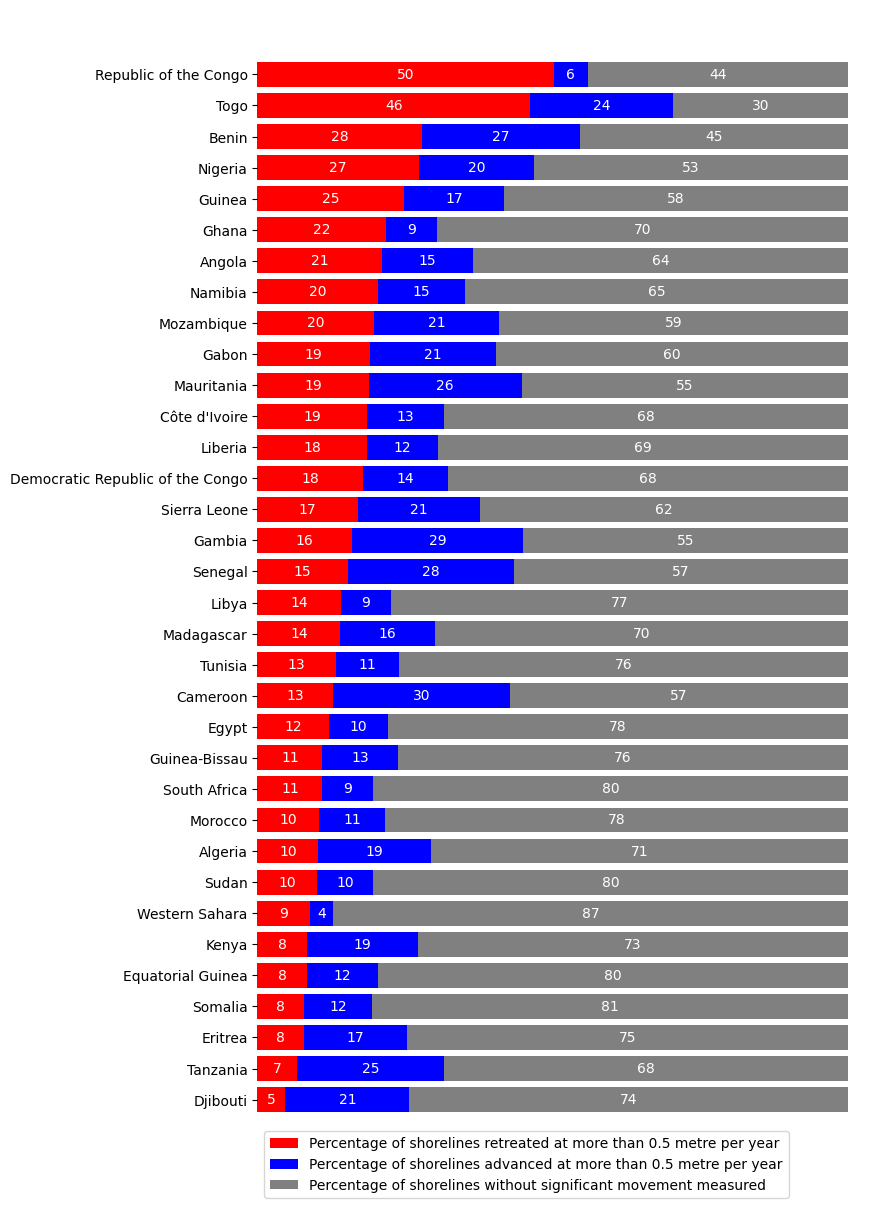

In [9]:
countries_sorted = countries_summary.sort_values(by='perc_neg05')

countries = list(countries_sorted.Country)
red_data = list(countries_sorted.perc_neg05)
white_data = list(countries_sorted.perc_pos05)
blue_data = list(countries_sorted.perc_no)

# Set the color scheme for the segments
colors = ['red', 'blue', 'grey']

# Create a list of indices for the bars
indices = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(8,15))

# Plot the stacked horizontal bars
red_bars = ax.barh(indices, red_data, color=colors[0], label='Percentage of shorelines retreated at more than 0.5 metre per year ')
white_bars = ax.barh(indices, white_data, left=red_data, color=colors[1], label='Percentage of shorelines advanced at more than 0.5 metre per year')
blue_bars = ax.barh(indices, blue_data, left=np.add(red_data, white_data), color=colors[2], label='Percentage of shorelines without significant movement measured')

# Remove spines and ticks
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add data value text to the center of each colored bar segment
for bars in [red_bars, white_bars, blue_bars]:
    for bar in bars:
        width = bar.get_width()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(width)), ha='center', va='center', color='white')

# Set the y-axis ticks and labels
ax.set_yticks(indices)
ax.set_yticklabels(countries)

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0, 0), ncol=1)

fig.savefig('countries_rate_perc.png', bbox_inches='tight')

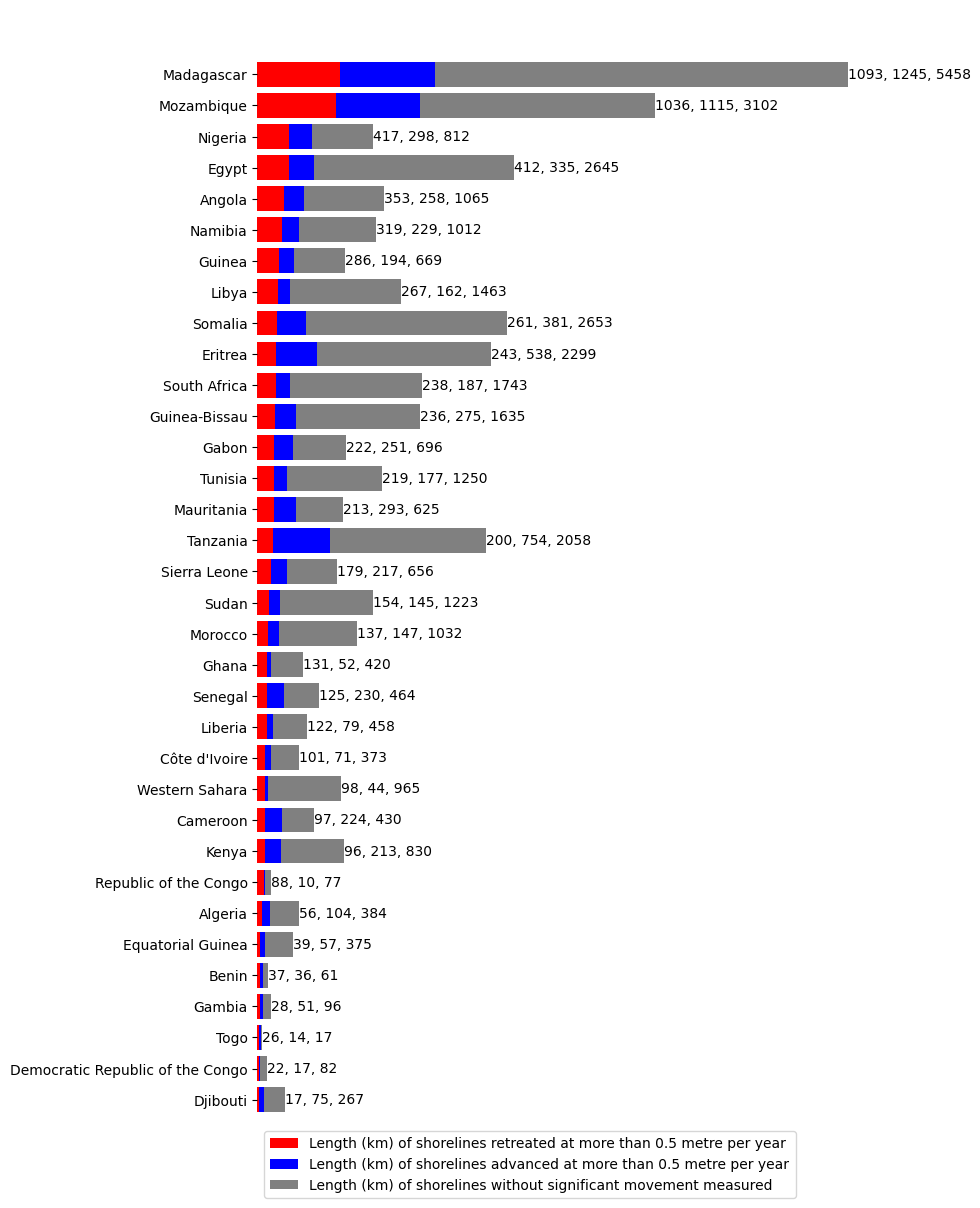

In [10]:
countries_sorted = countries_summary.sort_values(by='km_neg05')

countries = list(countries_sorted.Country)
red_data = list(countries_sorted.km_neg05)
white_data = list(countries_sorted.km_pos05)
blue_data = list(countries_sorted.km_no)

# Set the color scheme for the segments
colors = ['red', 'blue', 'grey']

# Create a list of indices for the bars
indices = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(8,15))

# Plot the stacked horizontal bars
red_bars = ax.barh(indices, red_data, color=colors[0], label='Length (km) of shorelines retreated at more than 0.5 metre per year ')
white_bars = ax.barh(indices, white_data, left=red_data, color=colors[1], label='Length (km) of shorelines advanced at more than 0.5 metre per year')
blue_bars = ax.barh(indices, blue_data, left=np.add(red_data, white_data), color=colors[2], label='Length (km) of shorelines without significant movement measured')

# Remove spines and ticks
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add data value text to the center of each bar segment
for i in range(len(countries)):
    total_width = red_data[i] + white_data[i] + blue_data[i]
    x_center = total_width
    y_center = indices[i]
    ax.text(x_center, y_center, f"{round(red_data[i])}, {round(white_data[i])}, {round(blue_data[i])}", ha='left', va='center')

# Set the y-axis ticks and labels
ax.set_yticks(indices)
ax.set_yticklabels(countries)

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0, 0), ncol=1)

fig.savefig('countries_rate_km.png',bbox_inches='tight')

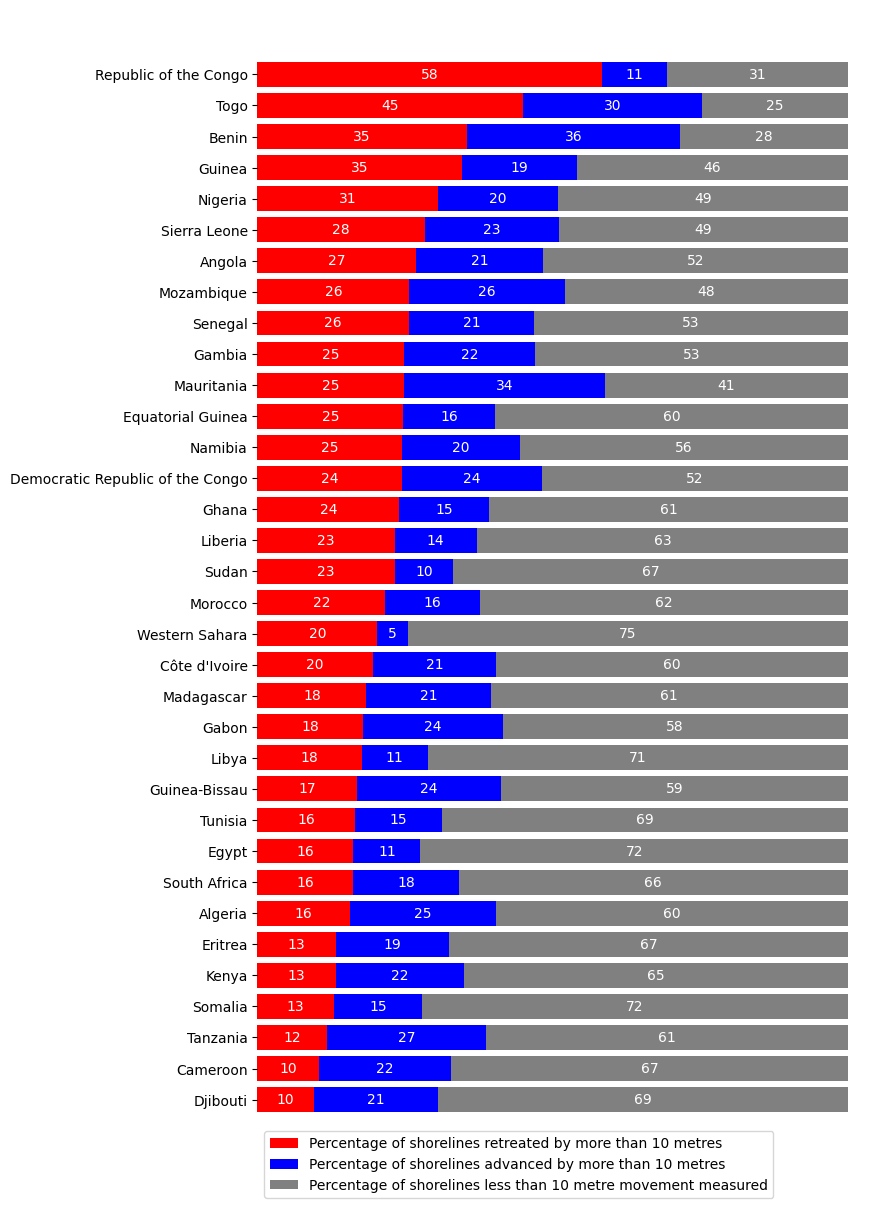

In [11]:
countries_sorted = countries_summary.sort_values(by='perc_negsm10')

countries = list(countries_sorted.Country)
red_data = list(countries_sorted.perc_negsm10)
white_data = list(countries_sorted.perc_possm10)
blue_data = list(countries_sorted.perc_nosm)

# Set the color scheme for the segments
colors = ['red', 'blue', 'grey']

# Create a list of indices for the bars
indices = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(8,15))

# Plot the stacked horizontal bars
red_bars = ax.barh(indices, red_data, color=colors[0], label='Percentage of shorelines retreated by more than 10 metres')
white_bars = ax.barh(indices, white_data, left=red_data, color=colors[1], label='Percentage of shorelines advanced by more than 10 metres')
blue_bars = ax.barh(indices, blue_data, left=np.add(red_data, white_data), color=colors[2], label='Percentage of shorelines less than 10 metre movement measured')

# Remove spines and ticks
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add data value text to the center of each colored bar segment
for bars in [red_bars, white_bars, blue_bars]:
    for bar in bars:
        width = bar.get_width()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(width)), ha='center', va='center', color='white')

# Set the y-axis ticks and labels
ax.set_yticks(indices)
ax.set_yticklabels(countries)

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0, 0), ncol=1)

fig.savefig('countries_sm_perc.png', bbox_inches='tight')

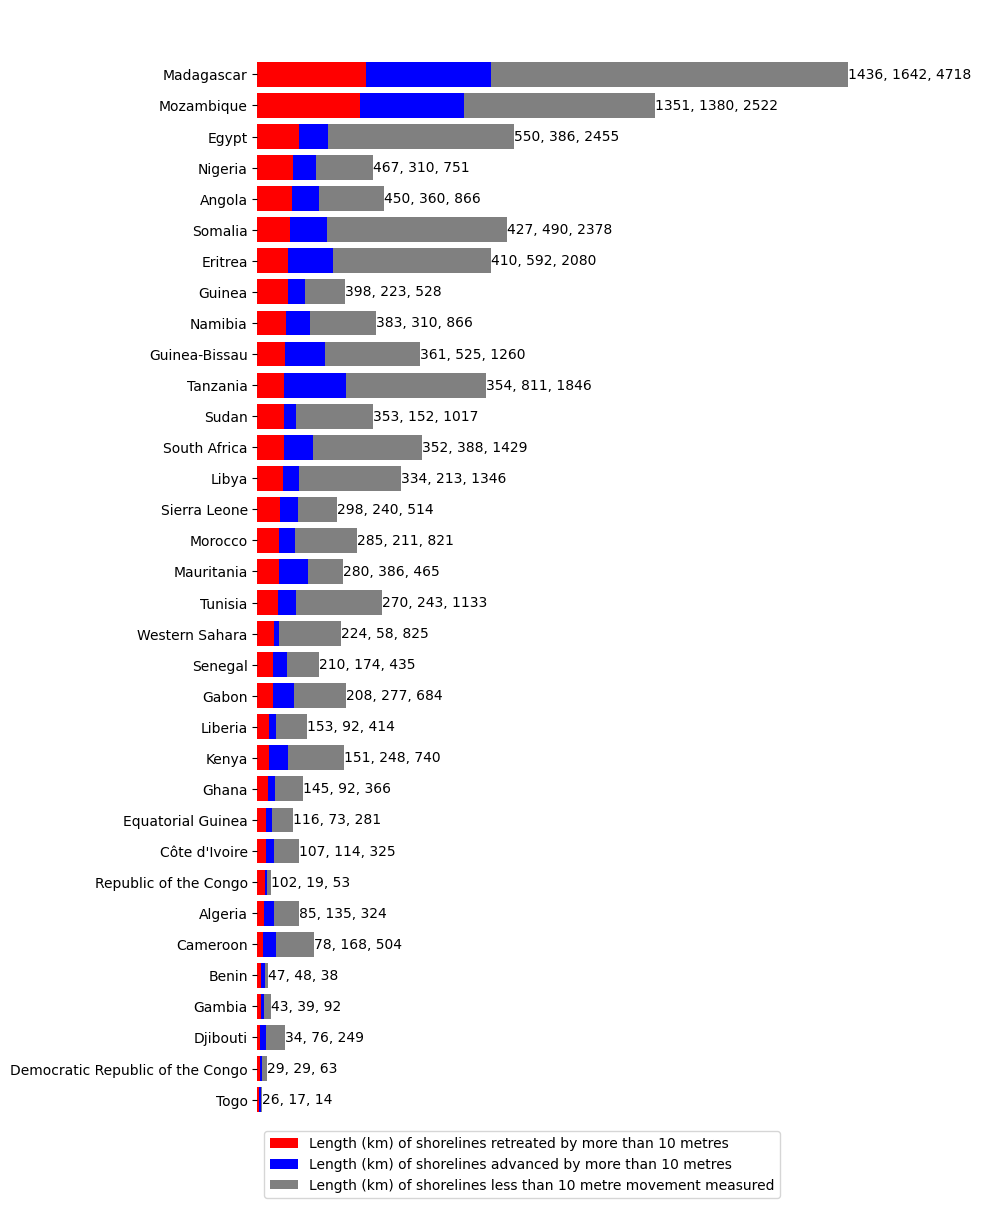

In [12]:
countries_sorted = countries_summary.sort_values(by='km_negsm10')

countries = list(countries_sorted.Country)
red_data = list(countries_sorted.km_negsm10)
white_data = list(countries_sorted.km_possm10)
blue_data = list(countries_sorted.km_nosm)

# Set the color scheme for the segments
colors = ['red', 'blue', 'grey']

# Create a list of indices for the bars
indices = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(8,15))

# Plot the stacked horizontal bars
red_bars = ax.barh(indices, red_data, color=colors[0], label='Length (km) of shorelines retreated by more than 10 metres')
white_bars = ax.barh(indices, white_data, left=red_data, color=colors[1], label='Length (km) of shorelines advanced by more than 10 metres')
blue_bars = ax.barh(indices, blue_data, left=np.add(red_data, white_data), color=colors[2], label='Length (km) of shorelines less than 10 metre movement measured')

# Remove spines and ticks
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add data value text to the center of each bar segment
for i in range(len(countries)):
    total_width = red_data[i] + white_data[i] + blue_data[i]
    x_center = total_width
    y_center = indices[i]
    ax.text(x_center, y_center, f"{round(red_data[i])}, {round(white_data[i])}, {round(blue_data[i])}", ha='left', va='center')

# Set the y-axis ticks and labels
ax.set_yticks(indices)
ax.set_yticklabels(countries)

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0, 0), ncol=1)

fig.savefig('countries_sm_km.png',bbox_inches='tight')

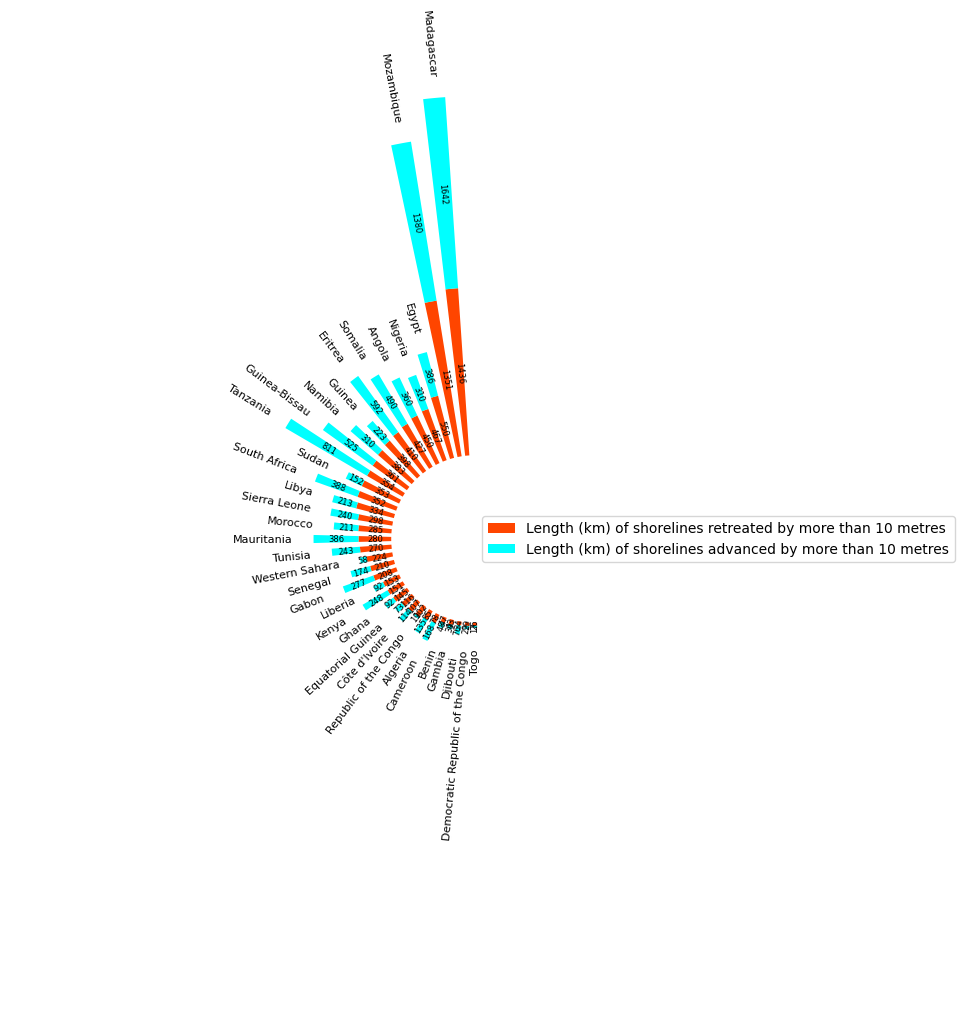

In [84]:
countries_sorted = countries_summary.sort_values(by='km_negsm10')

countries = list(countries_sorted.Country)
neg_data = list(countries_sorted.km_negsm10)
pos_data = list(countries_sorted.km_possm10)
non_data = list(countries_sorted.km_nosm)

# Set the color scheme for the segments
colors = ['orangered', 'cyan', 'grey']

# Calculate the angle for each bar
angles = np.linspace(0, np.pi, len(countries), endpoint=False)

# Create a polar plot
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, polar=True)

base=[np.max(neg_data)/2]*len(neg_data)
w=0.05
# Plot the red segments
ax.bar(angles, base, width=w, color='white')
neg_bars=ax.bar(angles, neg_data, width=w, bottom=base, color=colors[0], label='Length (km) of shorelines retreated by more than 10 metres')
# Plot the white segments on top of the red segments
pos_bars=ax.bar(angles, pos_data, width=w, bottom=np.add(base, neg_data), color=colors[1], label='Length (km) of shorelines advanced by more than 10 metres')
# Plot the blue segments on top of the red and white segments
#ax.bar(angles, blue_data, width=0.5, bottom=np.add(red_data, white_data), color=colors[2], label='Blue')

# Set the starting angle at the top (North)
ax.set_theta_zero_location("S")

# Set the clockwise direction for the bars
ax.set_theta_direction(-1)

# Set the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0.5, 0.5), ncol=1)

# Add country labels radially
for angle, country, label_radius in zip(angles, countries, np.add(np.add(np.add(neg_data, pos_data), base), np.max(neg_data)/8)):
    ax.text(angle, label_radius, country, ha='right', va='center', fontsize=8,
            rotation=270,#np.degrees(angle), 
            rotation_mode='anchor', transform_rotates_text=True)

# Add data value text to the center of each colored bar segment
for bars in [neg_bars, pos_bars]:
    for bar in bars:
        h = bar.get_height()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(h)), ha='center', va='center', fontsize=6, 
                color='black', rotation=270, rotation_mode='anchor', transform_rotates_text=True)

# Remove gridlines
ax.grid(True)

fig.savefig('countries_sm_km_polar.png',bbox_inches='tight')

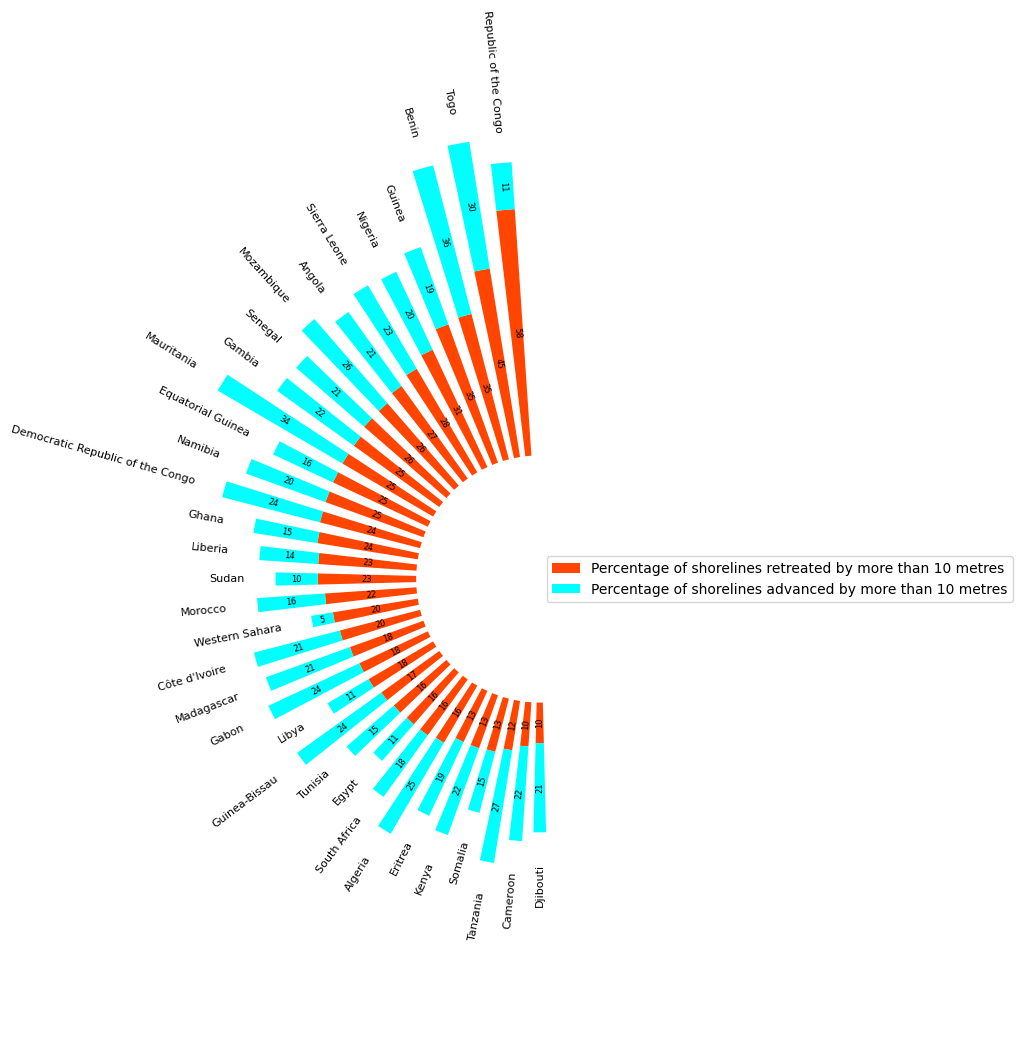

In [82]:
countries_sorted = countries_summary.sort_values(by='perc_negsm10')


countries = list(countries_sorted.Country)
neg_data = list(countries_sorted.perc_negsm10)
pos_data = list(countries_sorted.perc_possm10)

# Set the color scheme for the segments
colors = ['orangered', 'cyan', 'grey']

# Calculate the angle for each bar
angles = np.linspace(0, np.pi, len(countries), endpoint=False)

# Create a polar plot
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, polar=True)

base=[np.max(neg_data)/2]*len(neg_data)
w=0.05
# Plot the red segments
ax.bar(angles, base, width=w, color='white')
neg_bars = ax.bar(angles, neg_data, width=w, bottom=base, color=colors[0], label='Percentage of shorelines retreated by more than 10 metres')
# Plot the white segments on top of the red segments
pos_bars = ax.bar(angles, pos_data, width=w, bottom=np.add(base, neg_data), color=colors[1], label='Percentage of shorelines advanced by more than 10 metres')
# Plot the blue segments on top of the red and white segments
#ax.bar(angles, blue_data, width=0.5, bottom=np.add(red_data, white_data), color=colors[2], label='Blue')

# Set the starting angle at the top (North)
ax.set_theta_zero_location("S")

# Set the clockwise direction for the bars
ax.set_theta_direction(-1)

# Set the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

# Place the legend outside of the figure
ax.legend(loc='center left', bbox_to_anchor=(0.5, 0.5), ncol=1)

# Add country labels radially
for angle, country, label_radius in zip(angles, countries, np.add(np.add(np.add(neg_data, pos_data), base), np.max(neg_data)/8)):
    ax.text(angle, label_radius, country, ha='right', va='center', fontsize=8,
            rotation=270,#np.degrees(angle), 
            rotation_mode='anchor', transform_rotates_text=True)

    
# Add data value text to the center of each colored bar segment
for bars in [neg_bars, pos_bars]:
    for bar in bars:
        h = bar.get_height()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(h)), ha='center', va='center', fontsize=6, 
                color='black', rotation=270, rotation_mode='anchor', transform_rotates_text=True)

        
fig.savefig('countries_sm_perc_polar.png',bbox_inches='tight')

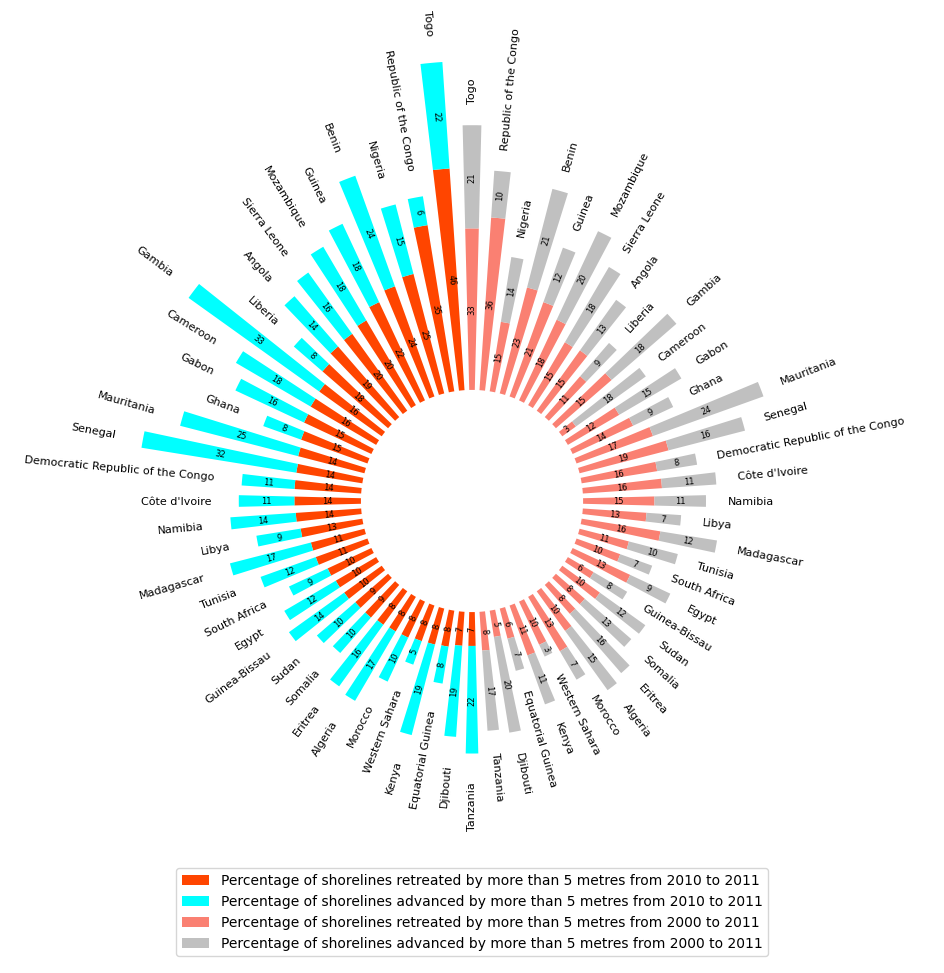

In [131]:
countries_sorted = countries_summary.sort_values(by='perc_negsm5_2010_2021')

countries = list(countries_sorted.Country)
neg_data = list(countries_sorted.perc_negsm5_2010_2021)
pos_data = list(countries_sorted.perc_possm5_2010_2021)

# Set the color scheme for the segments
colors = ['orangered', 'aqua', 'grey']

# Calculate the angle for each bar
angles = np.linspace(0, np.pi, len(countries), endpoint=False)

# Create a polar plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, polar=True)

base=[np.max(neg_data)/2]*len(neg_data)
w=0.05
# Plot the red segments
ax.bar(angles, base, width=w, color='white')
neg_bars = ax.bar(angles, neg_data, width=w, bottom=base, color=colors[0], label='Percentage of shorelines retreated by more than 5 metres from 2010 to 2011')
# Plot the white segments on top of the red segments
pos_bars = ax.bar(angles, pos_data, width=w, bottom=np.add(base, neg_data), color=colors[1], label='Percentage of shorelines advanced by more than 5 metres from 2010 to 2011')
# Plot the blue segments on top of the red and white segments
#ax.bar(angles, blue_data, width=0.5, bottom=np.add(red_data, white_data), color=colors[2], label='Blue')

# Set the starting angle at the top (North)
ax.set_theta_zero_location("S")

# Set the clockwise direction for the bars
ax.set_theta_direction(-1)

# Set the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

# Place the legend outside of the figure
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=1)

# Add country labels radially
for angle, country, label_radius in zip(angles, countries, np.add(np.add(np.add(neg_data, pos_data), base), np.max(neg_data)/8)):
    ax.text(angle, label_radius, country, ha='right', va='center', fontsize=8,
            rotation=270,#np.degrees(angle), 
            rotation_mode='anchor', transform_rotates_text=True)

    
# Add data value text to the center of each colored bar segment
for bars in [neg_bars, pos_bars]:
    for bar in bars:
        h = bar.get_height()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(h)), ha='center', va='center', fontsize=6, 
                color='black', rotation=270, rotation_mode='anchor', transform_rotates_text=True)


countries = list(countries_sorted.Country)[::-1]
neg_data = list(countries_sorted.perc_negsm5_2000_2011)[::-1]
pos_data = list(countries_sorted.perc_possm5_2000_2011)[::-1]

# Set the color scheme for the segments
colors = ['salmon', 'silver', 'grey']

# Calculate the angle for each bar
angles = np.linspace(np.pi, 2*np.pi, len(countries), endpoint=False)

w=0.05
# Plot the red segments
ax.bar(angles, base, width=w, color='white')
neg_bars = ax.bar(angles, neg_data, width=w, bottom=base, color=colors[0], label='Percentage of shorelines retreated by more than 5 metres from 2000 to 2011')
# Plot the white segments on top of the red segments
pos_bars = ax.bar(angles, pos_data, width=w, bottom=np.add(base, neg_data), color=colors[1], label='Percentage of shorelines advanced by more than 5 metres from 2000 to 2011')
# Plot the blue segments on top of the red and white segments
#ax.bar(angles, blue_data, width=0.5, bottom=np.add(red_data, white_data), color=colors[2], label='Blue')


# Set the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")

# Place the legend outside of the figure
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=1)

# Add country labels radially
for angle, country, label_radius in zip(angles, countries, np.add(np.add(np.add(neg_data, pos_data), base), np.max(neg_data)/8)):
    ax.text(angle, label_radius, country, ha='left', va='center', fontsize=8,
            rotation=90,#np.degrees(angle), 
            rotation_mode='anchor', transform_rotates_text=True)

    
# Add data value text to the center of each colored bar segment
for bars in [neg_bars, pos_bars]:
    for bar in bars:
        h = bar.get_height()
        x_center = bar.get_x() + bar.get_width() / 2
        y_center = bar.get_y() + bar.get_height() / 2
        ax.text(x_center, y_center, str(round(h)), ha='center', va='center', fontsize=6, 
                color='black', rotation=90, rotation_mode='anchor', transform_rotates_text=True)

fig.savefig('countries_sm_perc_polar_2_periods_significant.png',bbox_inches='tight')